# CCT College Dublin

## Assessment Cover Page

**Module Title**: Machine Learning for AI  
**Assessment Title**: ML_CA1  
**Lecturer Name**: David McQuaid  
**Student Full Name**: Ingrid Menezes Castro  
**Student Number**: 2020341  
**Assessment Due Date**: 31/05/2024  
**Date of Submission**: 31/05/2024  

**GITHUB LINK**: https://github.com/IC2020341/IngridCastro_ML_CA2

## Declaration

<div style="border: 1px solid black; padding: 10px;">
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

-------------

In [1]:
# Imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Data Preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#NN
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential

In [2]:
# Instalations

-----------

# Summary

**1. Neural Networks**
- Data Understanding
- Data Visualisation
- Data Preparation
- Task 1: Algorithms and Neural Networks
- Task 2: Prediction of a New Customer

**2. Semantic Analysis**
- Data Understanding
- Data Preparation
- Task 1: Sentiment Analysis
- Task 2: Visualisations

------------

# 1. Neural Networks

## 1.1. Data Understanding

In this first part of the data analysis we try to understand what are we dealing with, search for missing/ duplicated/NA values and do some EDA

In [3]:
df1 = pd.read_csv("BankRecords.csv")

In [4]:
df1.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             No         No  
2                 No         No             No         No  
3                 No         No             No         No  
4                 No         No             No        Yes

In [5]:
df1.shape

(5000, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [7]:
df1.describe()

ID          Age  Experience(Years)  Income(Thousands's)  \
count  5000.000000  5000.000000        5000.000000          5000.000000   
mean   2500.500000    45.338400          20.104600            73.774200   
std    1443.520003    11.463166          11.467954            46.033729   
min       1.000000    23.000000          -3.000000             8.000000   
25%    1250.750000    35.000000          10.000000            39.000000   
50%    2500.500000    45.000000          20.000000            64.000000   
75%    3750.250000    55.000000          30.000000            98.000000   
max    5000.000000    67.000000          43.000000           224.000000   

          Sort Code       Family  Credit Score  Mortgage(Thousands's)  
count   5000.000000  5000.000000   5000.000000            5000.000000  
mean   93152.503000     2.396400      1.937913              56.498800  
std     2121.852197     1.147663      1.747666             101.713802  
min     9307.000000     1.000000      0.000000               0.000000  
25%    91911.000000     1.000000      0.700000               0.000000  
50%    93437.000000     2.000000      1.500000               0.000000  
75%    94608.000000     3.000000      2.500000             101.000000  
max    96651.000000     4.000000     10.000000             635.000000

In [8]:
df1.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

In [9]:
df1.nunique()

ID                       5000
Age                        45
Experience(Years)          47
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

## 1.2. Data Visualisations

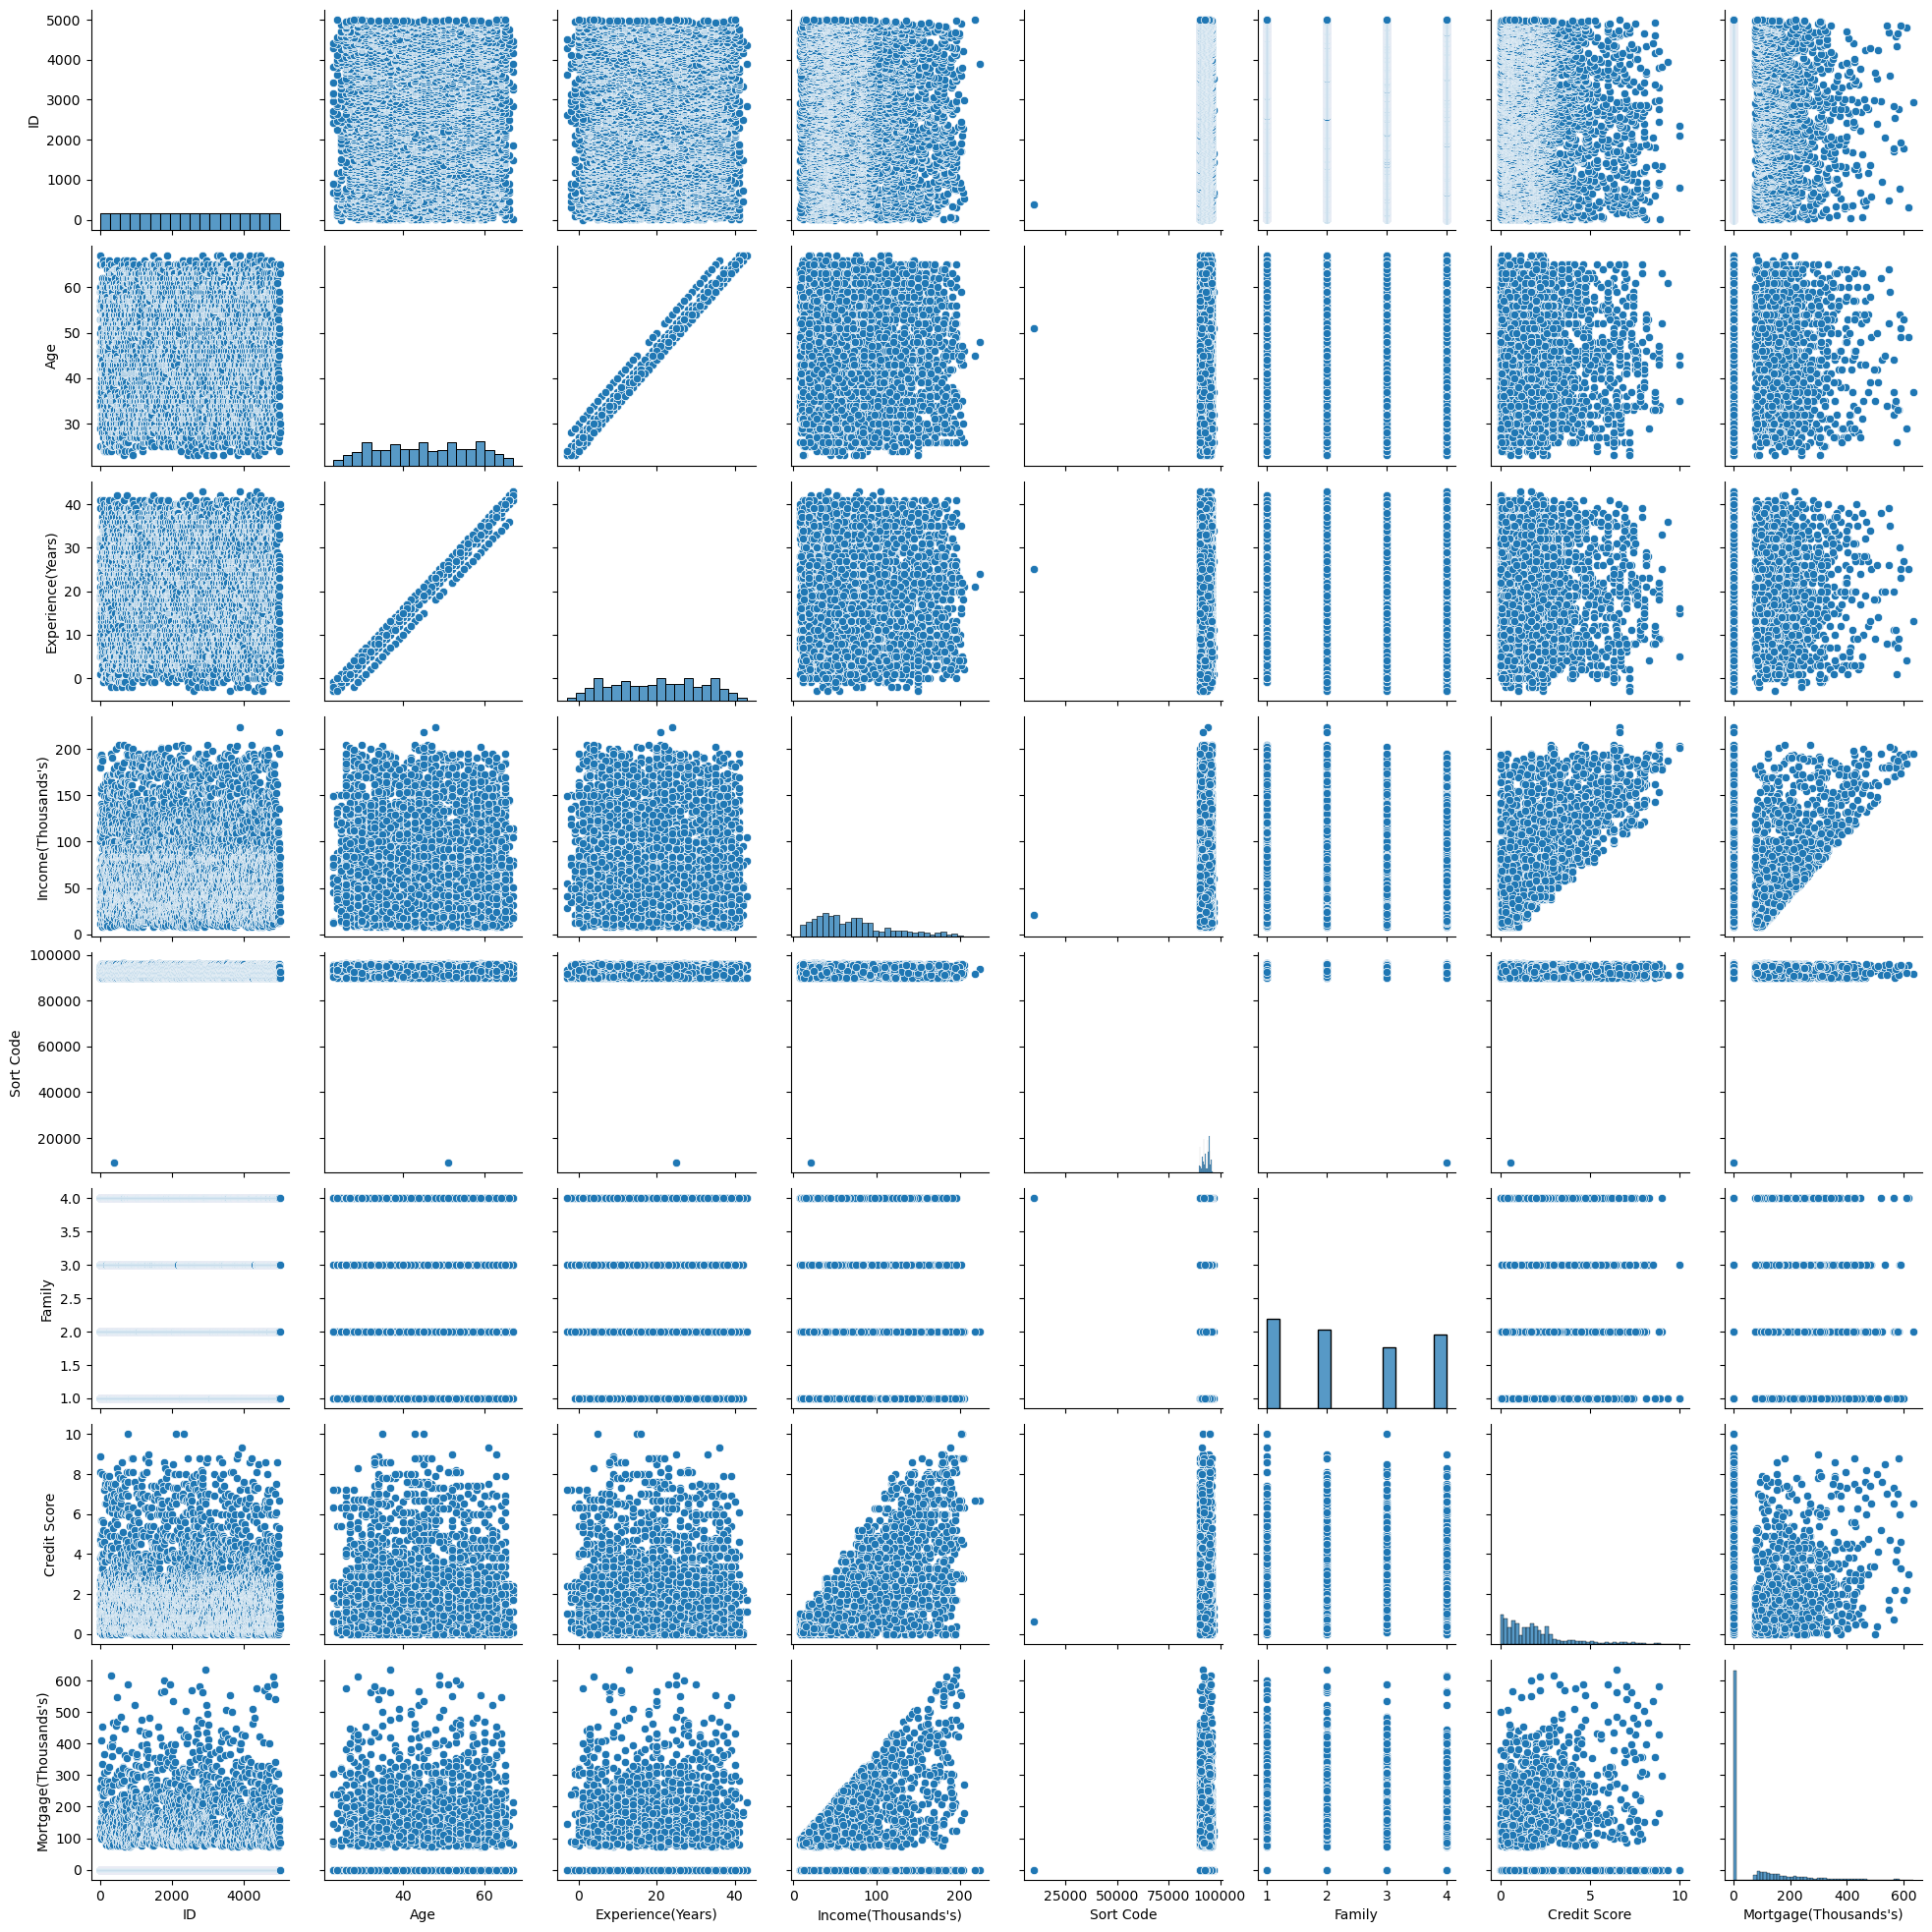

In [12]:
sns.pairplot(df1)
plt.show()

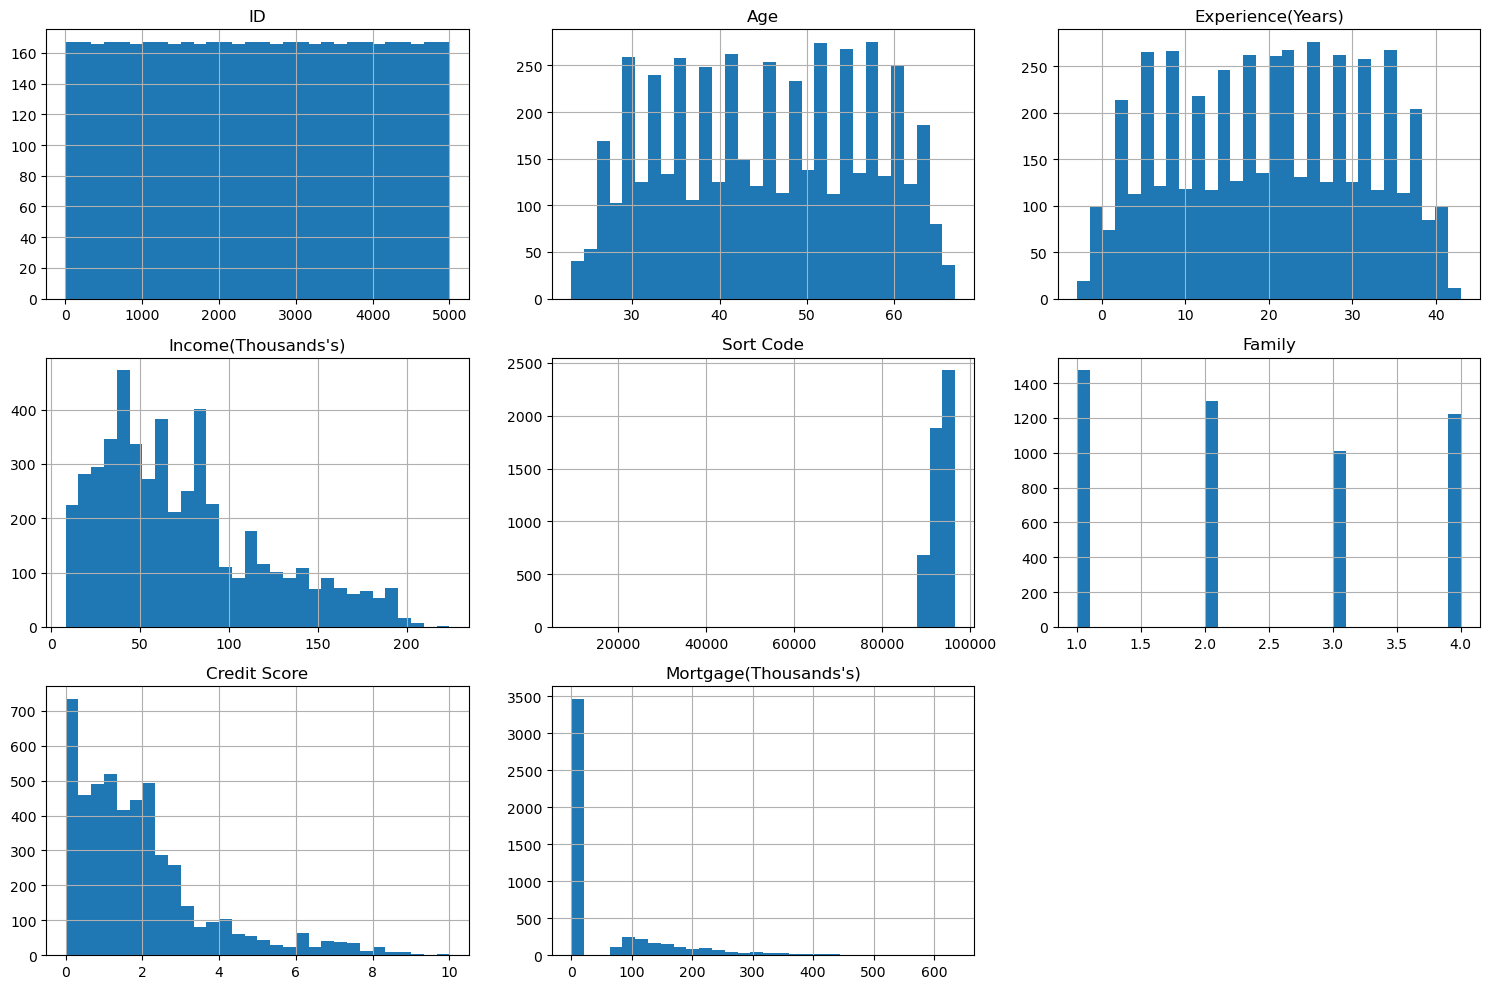

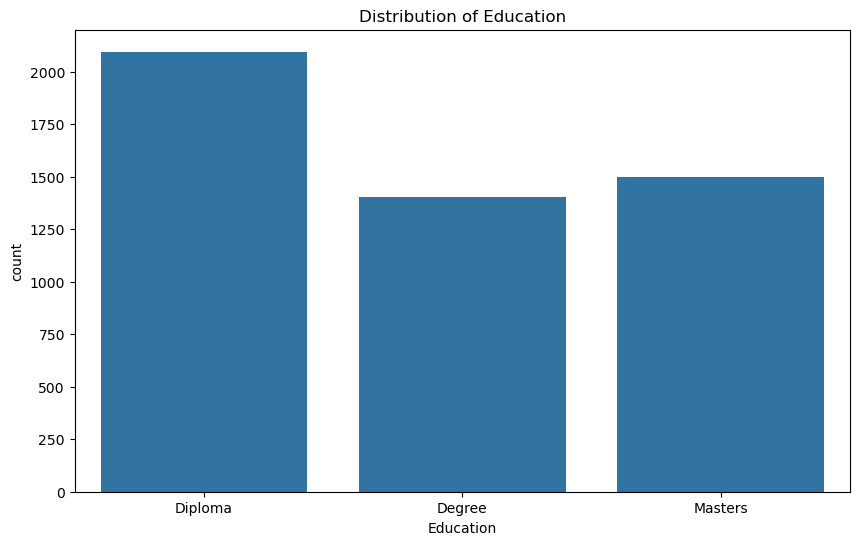

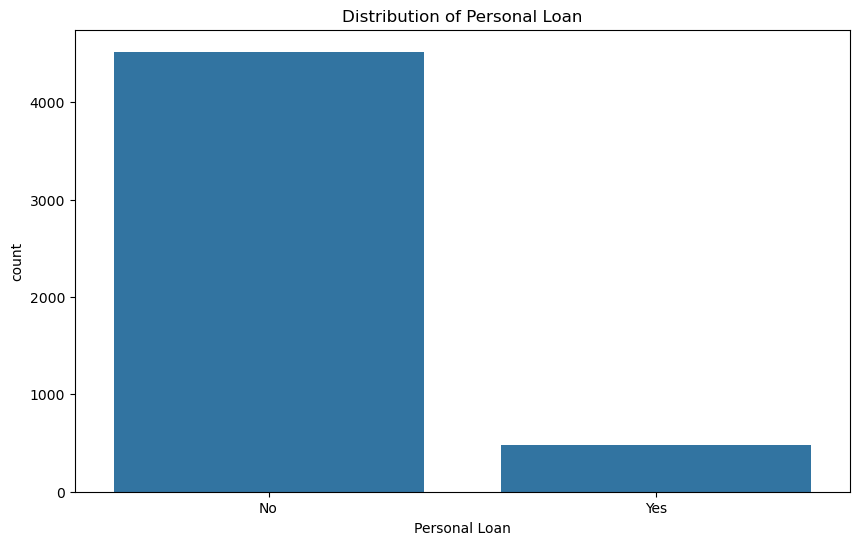

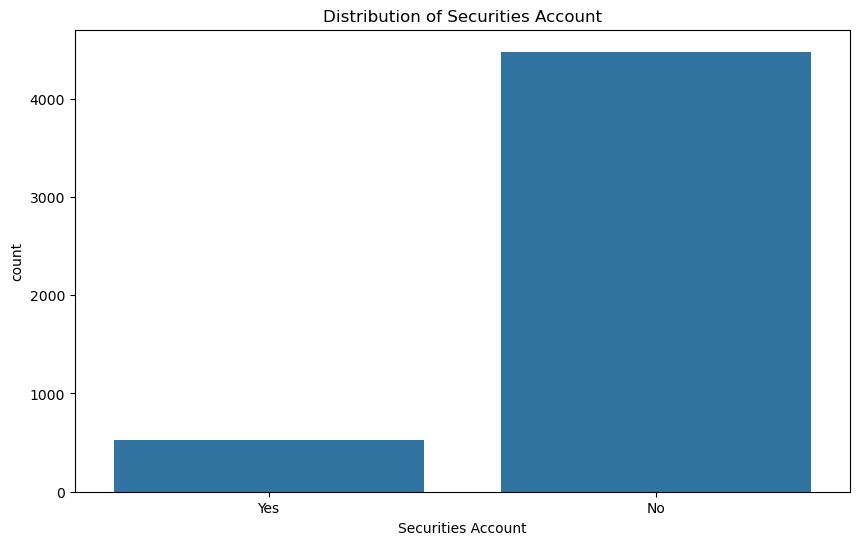

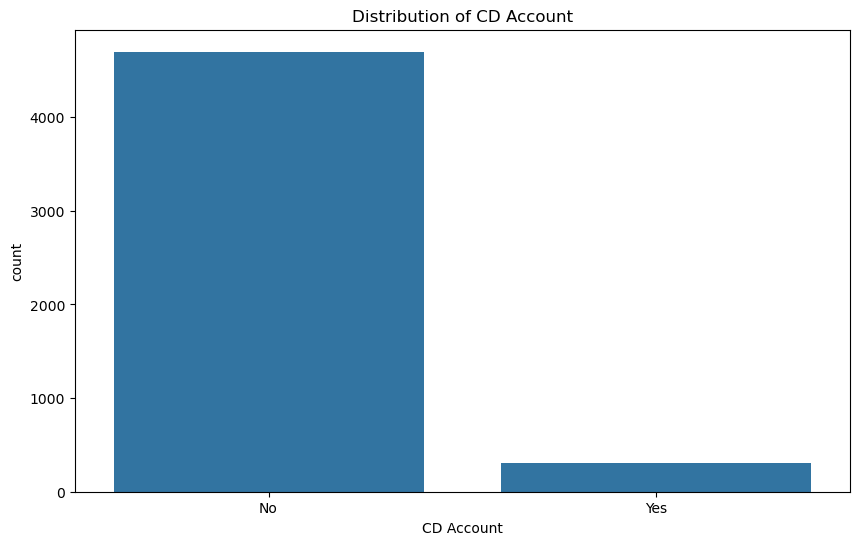

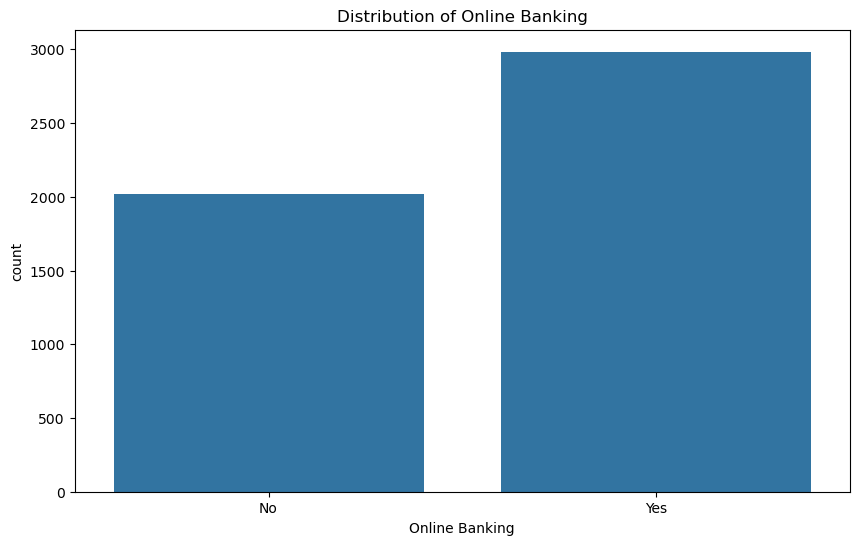

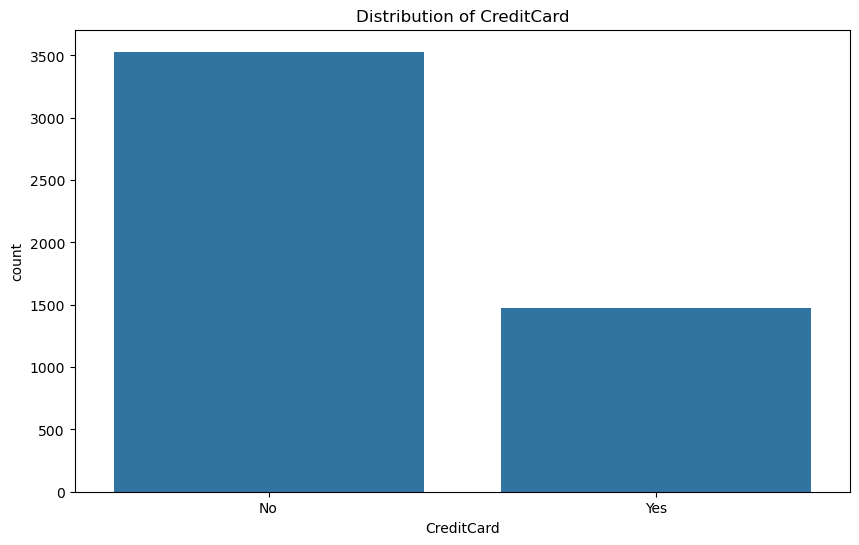

In [13]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df1.select_dtypes(include=['object', 'bool', 'category']).columns

df1[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(len(numeric_columns)//3+1, 3))
plt.tight_layout()
plt.show()

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df1)
    plt.title(f'Distribution of {column}')
    plt.show()

In [14]:
age_counts = df1['Age'].value_counts().sort_index(ascending=True)
age_counts

Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
Name: count, dtype: int64

Observation: There are negative values for Experience(Years) as should be seen below. This should be treated when Scaling the data.

In [15]:
experience_counts = df1['Experience(Years)'].value_counts().sort_index(ascending=True)
experience_counts

Experience(Years)
-3       4
-2      15
-1      33
 0      66
 1      74
 2      85
 3     129
 4     113
 5     146
 6     119
 7     121
 8     119
 9     147
 10    118
 11    116
 12    102
 13    117
 14    127
 15    119
 16    127
 17    125
 18    137
 19    135
 20    148
 21    113
 22    124
 23    144
 24    131
 25    142
 26    134
 27    125
 28    138
 29    124
 30    126
 31    104
 32    154
 33    117
 34    125
 35    143
 36    114
 37    116
 38     88
 39     85
 40     57
 41     43
 42      8
 43      3
Name: count, dtype: int64

## 1.3. Data preparation

In data preparation we need to do the following:
- Encode variables;
- Scale data;
- Prepare for modelling;

For the encoding of variables we need to transform the categorical variables in numerical so we can later scale, split etc. In the next cells we will label encoder the variables:
- Personal Loan;
- Securities Account;
- CD Account;
- Online Banking;
- and Credit Card;

These variables are expressed in 'Yes' or 'No' and we encoded Yes to be 1 and No to be 0.

In [16]:
label_encoder = LabelEncoder()
columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

for column in columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [17]:
df1.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's)  Personal Loan  \
0           1.6   Diploma                      0              0   
1           1.5   Diploma                      0              0   
2           1.0   Diploma                      0              0   
3           2.7    Degree                      0              0   
4           1.0    Degree                      0              0   

   Securities Account  CD Account  Online Banking  CreditCard  
0                   1           0               0           0  
1                   1           0               0           0  
2                   0           0               0           0  
3                   0           0               0           0  
4                   0           0               0           1

As you can see above the 'Education' variable is still categorical, so for this one we will apply dummies which will create three new columns:
- Education_Degree;
- Education_Diploma;
- Education_Masters;

On the next cell I have transformed the Boolean columns in INT32.

In [18]:
df1 = pd.get_dummies(df1, columns=['Education'])
df1.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score  Mortgage(Thousands's)  Personal Loan  Securities Account  \
0           1.6                      0              0                   1   
1           1.5                      0              0                   1   
2           1.0                      0              0                   0   
3           2.7                      0              0                   0   
4           1.0                      0              0                   0   

   CD Account  Online Banking  CreditCard  Education_Degree  \
0           0               0           0             False   
1           0               0           0             False   
2           0               0           0             False   
3           0               0           0              True   
4           0               0           1              True   

   Education_Diploma  Education_Masters  
0               True              False  
1               True              False  
2               True              False  
3              False              False  
4              False              False

In [19]:
boolean = ['Education_Degree', 'Education_Diploma', 'Education_Masters']
df1[boolean] = df1[boolean].astype(int)

In [20]:
df1.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score  Mortgage(Thousands's)  Personal Loan  Securities Account  \
0           1.6                      0              0                   1   
1           1.5                      0              0                   1   
2           1.0                      0              0                   0   
3           2.7                      0              0                   0   
4           1.0                      0              0                   0   

   CD Account  Online Banking  CreditCard  Education_Degree  \
0           0               0           0                 0   
1           0               0           0                 0   
2           0               0           0                 0   
3           0               0           0                 1   
4           0               0           1                 1   

   Education_Diploma  Education_Masters  
0                  1                  0  
1                  1                  0  
2                  1                  0  
3                  0                  0  
4                  0                  0

In [21]:
df1.drop(columns=['Sort Code'], inplace=True)

In [22]:
df1.dtypes

ID                         int64
Age                        int64
Experience(Years)          int64
Income(Thousands's)        int64
Family                     int64
Credit Score             float64
Mortgage(Thousands's)      int64
Personal Loan              int32
Securities Account         int32
CD Account                 int32
Online Banking             int32
CreditCard                 int32
Education_Degree           int32
Education_Diploma          int32
Education_Masters          int32
dtype: object

In [23]:
df1['Credit Score'] = (df1['Credit Score'] * 10).astype(int)

In [24]:
df1.head()

ID  Age  Experience(Years)  Income(Thousands's)  Family  Credit Score  \
0   1   25                  1                   49       4            16   
1   2   45                 19                   34       3            15   
2   3   39                 15                   11       1            10   
3   4   35                  9                  100       1            27   
4   5   35                  8                   45       4            10   

   Mortgage(Thousands's)  Personal Loan  Securities Account  CD Account  \
0                      0              0                   1           0   
1                      0              0                   1           0   
2                      0              0                   0           0   
3                      0              0                   0           0   
4                      0              0                   0           0   

   Online Banking  CreditCard  Education_Degree  Education_Diploma  \
0               0           0                 0                  1   
1               0           0                 0                  1   
2               0           0                 0                  1   
3               0           0                 1                  0   
4               0           1                 1                  0   

   Education_Masters  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

### Scale The data

For scaling I will use the StandardScaler. The independent Variables (X) are all the other columns but 'Income(Thousands's)', while the dependent variable (y) is 'Income(Thousands's)'.

In [25]:
X = df1.iloc[:, np.r_[0:3, 4:15]]
y = df1.iloc[:, 3]

In [26]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(150))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1))

C:\Users\ingri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ingri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [28]:
# model = Sequential()
# model.add(Dense(100, input_shape=(X.shape[1]), activation='relu'))
# model.add(Dense(150, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(40, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='relu'))

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X, y, epochs=500, batch_size=10, verbose=2)

Epoch 1/500
500/500 - 3s - 6ms/step - loss: 1619.3965 - mse: 1619.3965
Epoch 2/500
500/500 - 0s - 780us/step - loss: 926.6094 - mse: 926.6094
Epoch 3/500
500/500 - 0s - 867us/step - loss: 890.1182 - mse: 890.1182
Epoch 4/500
500/500 - 0s - 767us/step - loss: 869.0519 - mse: 869.0519
Epoch 5/500
500/500 - 0s - 763us/step - loss: 844.6701 - mse: 844.6701
Epoch 6/500
500/500 - 0s - 757us/step - loss: 836.7062 - mse: 836.7062
Epoch 7/500
500/500 - 0s - 746us/step - loss: 804.4727 - mse: 804.4727
Epoch 8/500
500/500 - 0s - 758us/step - loss: 790.1239 - mse: 790.1239
Epoch 9/500
500/500 - 0s - 757us/step - loss: 772.0901 - mse: 772.0901
Epoch 10/500
500/500 - 0s - 759us/step - loss: 776.4224 - mse: 776.4224
Epoch 11/500
500/500 - 0s - 757us/step - loss: 753.0767 - mse: 753.0767
Epoch 12/500
500/500 - 0s - 794us/step - loss: 748.2004 - mse: 748.2004
Epoch 13/500
500/500 - 0s - 855us/step - loss: 742.4177 - mse: 742.4177
Epoch 14/500
500/500 - 1s - 1ms/step - loss: 743.2536 - mse: 743.2536
Epo

In [30]:
scores = model.evaluate(X,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 38.2980 - mse: 38.2980
compile_metrics: 3962.94%


In [31]:
y_pred_nn = model.predict(X)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


In [33]:
print(y_pred_nn)

[[51.46122 ]
 [33.265316]
 [12.631882]
 ...
 [21.078213]
 [41.93857 ]
 [86.52271 ]]


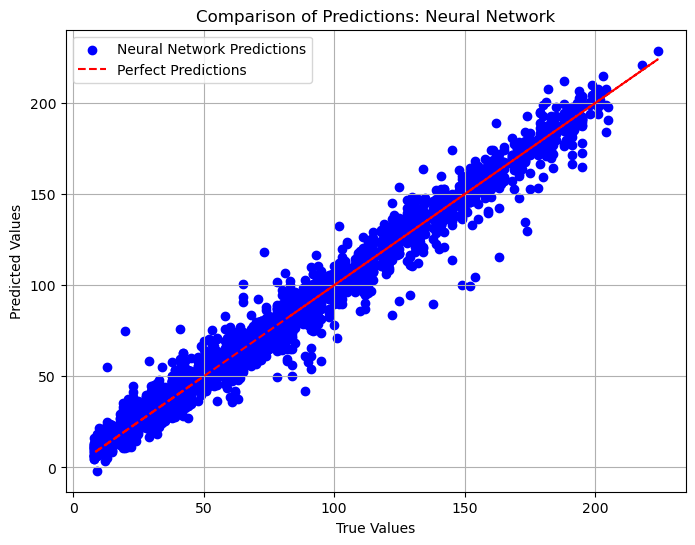

In [34]:
plt.figure(figsize=(8, 6))

plt.scatter(y, y_pred_nn, color='blue', label='Neural Network Predictions')

plt.plot(y, y, color='red', linestyle='--', label='Perfect Predictions')

plt.title('Comparison of Predictions: Neural Network')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()